**MUHAMMAD ISMAIL**

**PYTN-KS08-011**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.shape

(41188, 21)

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

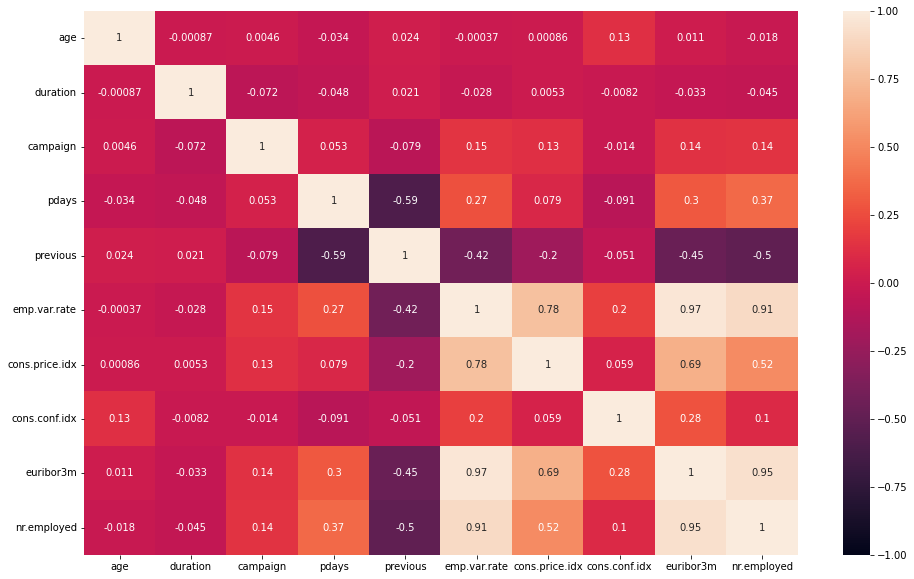

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

# EDA & Preprocessing

In [8]:
new_df = df.copy()

In [9]:
new_df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

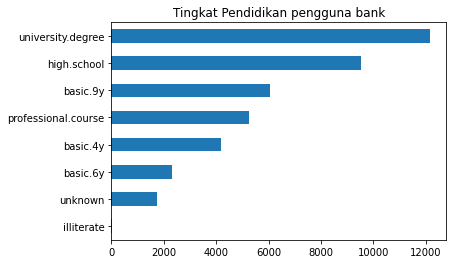

In [10]:
new_df['education'].value_counts().sort_values().plot(kind='barh', title='Tingkat Pendidikan pengguna bank')

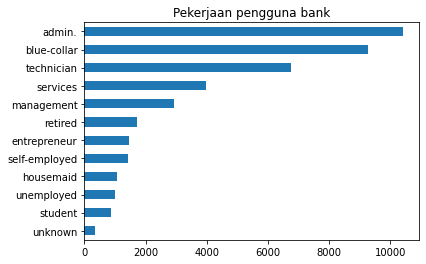

In [11]:
new_df['job'].value_counts().sort_values().plot(kind='barh', title='Pekerjaan pengguna bank')

Yang banyak bertransaksi di bank berasal dari lulusan perguruan tinggi

Text(0.5, 1.0, 'Hubungan antara umur dan lama berkomunikasi dengan bank')

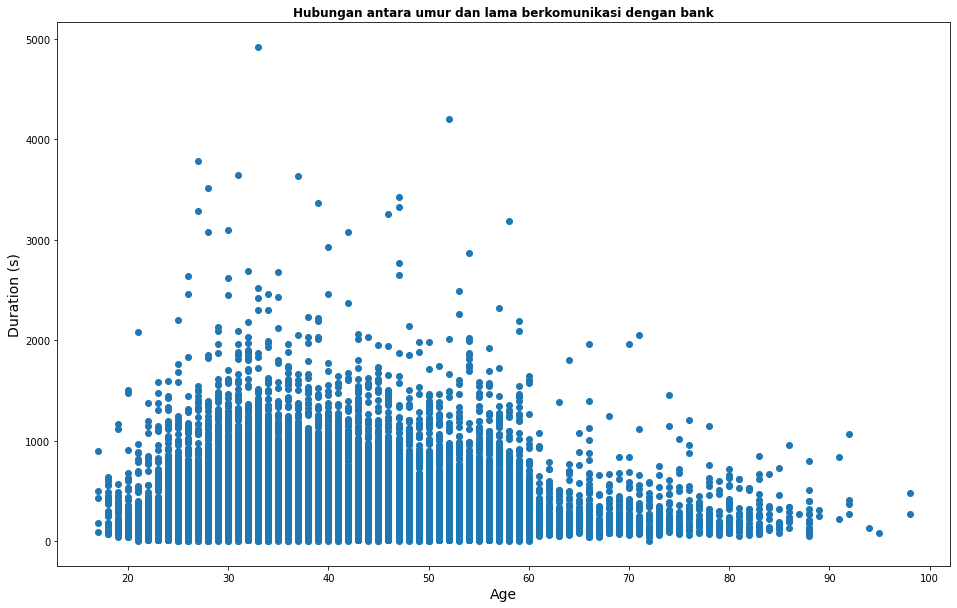

In [12]:
plt.figure(figsize=(16,10))
plt.scatter(x=new_df['age'], y=new_df['duration'])
plt.xlabel('Age', fontsize=14)
plt.ylabel('Duration (s)', fontsize=14)
plt.title('Hubungan antara umur dan lama berkomunikasi dengan bank', fontweight='bold')

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()
category_df = new_df.select_dtypes(include="object")
encode_df = new_df.copy()
for column in category_df.columns :
  encode_df[column] = encoder.fit_transform(new_df[column])
encode_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [15]:
numerics = ['int64','float64']
scaler = StandardScaler()
scaled_df = encode_df.copy()
numeric_df = new_df.select_dtypes(include=numerics)
for column in numeric_df.columns:
  scaled_df[column] = scaler.fit_transform(new_df[column].values.reshape(-1,1))
scaled_df = scaled_df.rename(columns={'y':'deposit'})
scaled_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,1.533034,3,1,0,0,0,0,1,6,1,0.010471,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,1.628993,7,1,3,1,0,0,1,6,1,-0.421501,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,-0.290186,7,1,3,0,2,0,1,6,1,-0.124520,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,-0.002309,0,1,1,0,0,0,1,6,1,-0.413787,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,1.533034,7,1,3,0,0,2,1,6,1,0.187888,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0


Cek relasi semua feature terhadap kolom deposit

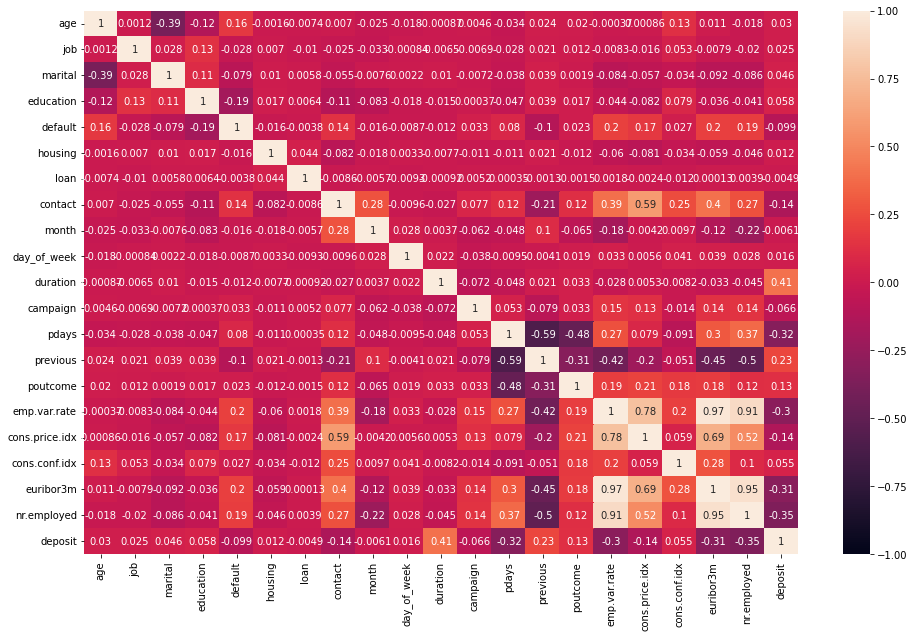

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(scaled_df.corr(), annot=True, vmin=-1, vmax=1)

Buang feature yang sedikit berkorelasi dengan kolom deposit

In [17]:
scaled_df.drop(columns=['default','loan','contact','month','campaign','pdays','emp.var.rate','cons.price.idx','euribor3m','nr.employed'], inplace=True)
scaled_df.head()

,age,job,marital,education,housing,day_of_week,duration,previous,poutcome,cons.conf.idx,deposit
0,1.533034,3,1,0,0,1,0.010471,-0.349494,1,0.886447,0
1,1.628993,7,1,3,0,1,-0.421501,-0.349494,1,0.886447,0
2,-0.290186,7,1,3,2,1,-0.124520,-0.349494,1,0.886447,0
3,-0.002309,0,1,1,0,1,-0.413787,-0.349494,1,0.886447,0
4,1.533034,7,1,3,0,1,0.187888,-0.349494,1,0.886447,0


In [18]:
from sklearn.model_selection import train_test_split
X = scaled_df.drop(columns=['deposit'])
y = scaled_df.deposit
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [20]:
lgr_model = LogisticRegression()

training model

In [21]:
lgr_model.fit(X_train,y_train)

LogisticRegression()

predict model

In [22]:
y_pred_lgr = lgr_model.predict(X_test)
y_pred_lgr

array([0, 0, 0, ..., 0, 1, 0])

In [23]:
lgr_model.predict_proba(X_test)

array([[0.89333715, 0.10666285],
       [0.8670316 , 0.1329684 ],
       [0.98047786, 0.01952214],
       ...,
       [0.93480413, 0.06519587],
       [0.14634469, 0.85365531],
       [0.9223341 , 0.0776659 ]])

Evaluation

In [24]:
accuracy_score_lgr = accuracy_score(y_test,y_pred_lgr)

In [25]:
accuracy_score_lgr

0.902889050740471

In [26]:
cv_scores_lgr = cross_val_score(lgr_model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', cv_scores_lgr)

Cross-Validation Accuracy Scores [0.9047041  0.90015175 0.90015175 0.89924127 0.90288316 0.90136571
 0.89924127 0.90440061 0.90379363 0.90257967]


#K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=2) 

In [29]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [30]:
y_pred_knn=knn_model.predict(X_test)

In [31]:
knn_model.kneighbors(X_test)

(array([[0.9589438 , 1.13528902],
        [0.96850818, 1.03952699],
        [0.10491934, 0.1624941 ],
        ...,
        [1.10195918, 1.11988708],
        [0.84737018, 1.11982318],
        [0.23328582, 0.23493716]]), array([[18216, 16612],
        [ 7499, 18018],
        [ 7048, 28465],
        ...,
        [24564, 17053],
        [24919,   325],
        [15435,  2711]]))

In [32]:
accuracy_score_lgr = accuracy_score(y_test,y_pred_knn)

In [33]:
accuracy_score_lgr

0.8922068463219228

# SVM (Support Vector Machine)

In [34]:
from sklearn.svm import SVC

In [35]:
svc_model = SVC(degree=2)

In [36]:
svc_model.fit(X_train, y_train)

SVC(degree=2)

In [37]:
y_pred_svc = svc_model.predict(X_test)

In [38]:
accuracy_score_svc = accuracy_score(y_test, y_pred_svc)

In [39]:
accuracy_score_svc

0.8996115562029618

# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.tree import export_graphviz

In [42]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [43]:
y_pred_dt = dt_model.predict(X_test)

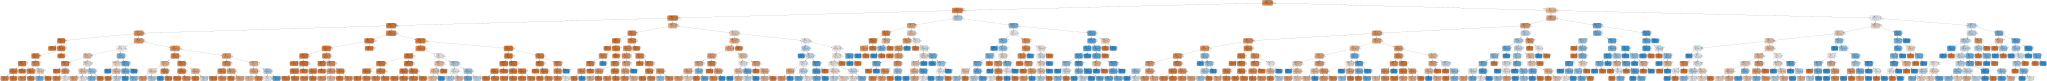

In [60]:
dot_data = export_graphviz(dt_model, out_file=None, 
                      class_names=scaled_df.deposit.astype('str'),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [45]:
accuracy_score_dt = accuracy_score(y_test, y_pred_dt)

In [46]:
accuracy_score_dt

0.9043457149793639

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred_rf = rf_model.predict(X_test)

In [64]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)

In [66]:
accuracy_score_rf

0.9093226511289147

#Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

In [69]:
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)

GaussianNB()

In [70]:
y_pred_gnb = gnb_model.predict(X_test)
y_pred_gnb

array([1, 0, 0, ..., 0, 1, 0])

In [71]:
accuracy_score_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_score_gnb

0.8811604758436514

# Evaluation Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix

## LGR CM

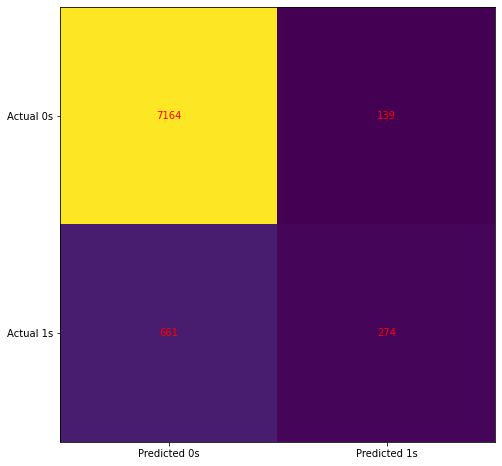

In [77]:
cm_lr = confusion_matrix(y_test, y_pred_lgr)
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm_lr)
ax.grid(False)

ax.xaxis.set(ticks = (0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks = (0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_lr[i, j], ha = "center", va ="center", color="red")
        
plt.show()

## KNN CM

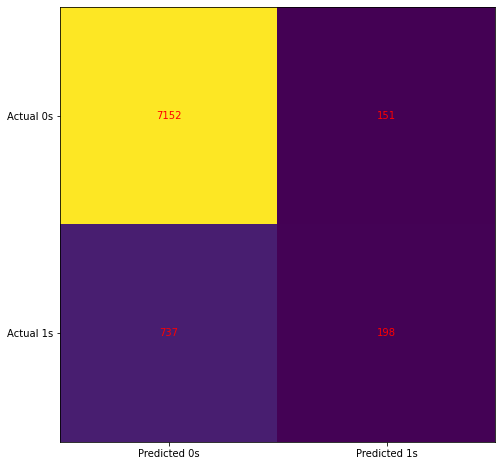

In [78]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm_knn)
ax.grid(False)

ax.xaxis.set(ticks = (0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks = (0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_knn[i, j], ha = "center", va ="center", color="red")
        
plt.show()

## SVM CM

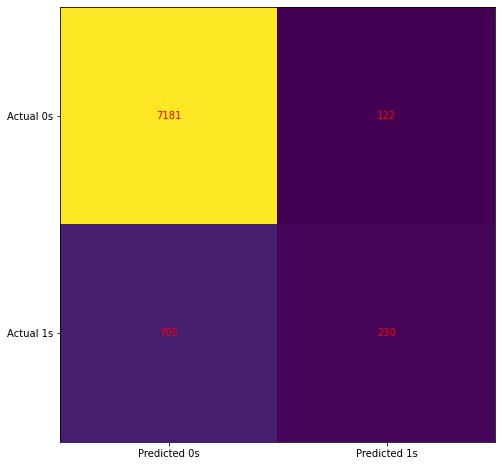

In [79]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm_svc)
ax.grid(False)

ax.xaxis.set(ticks = (0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks = (0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_svc[i, j], ha = "center", va ="center", color="red")
        
plt.show()

## DT CM

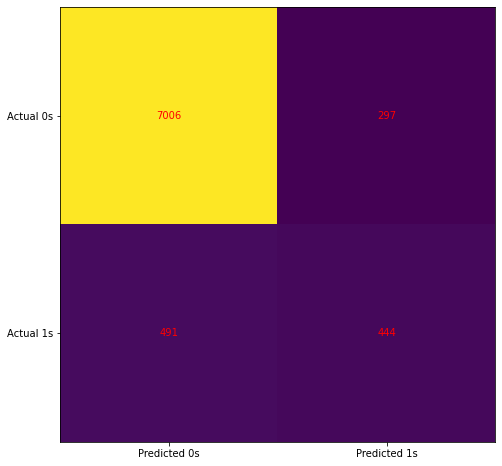

In [80]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm_dt)
ax.grid(False)

ax.xaxis.set(ticks = (0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks = (0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_dt[i, j], ha = "center", va ="center", color="red")
        
plt.show()

## RF CM

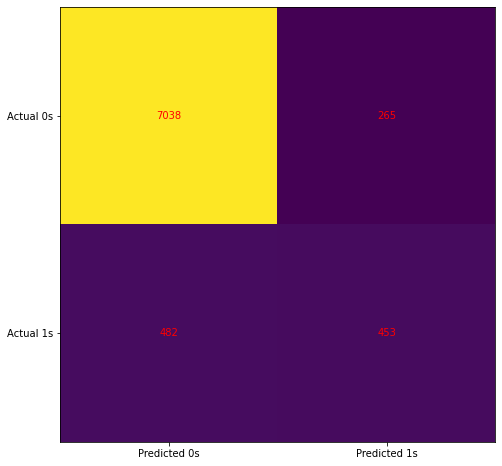

In [81]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm_rf)
ax.grid(False)

ax.xaxis.set(ticks = (0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks = (0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_rf[i, j], ha = "center", va ="center", color="red")
        
plt.show()

## NB CM

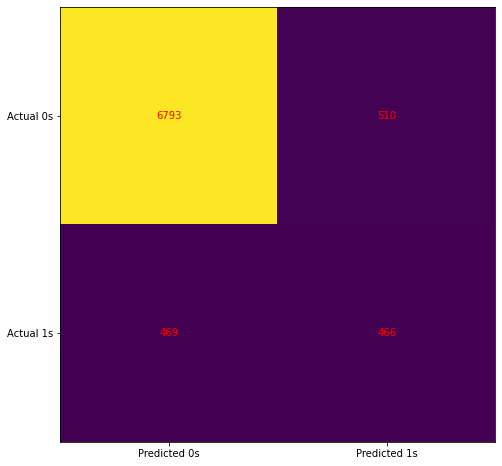

In [83]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm_gnb)
ax.grid(False)

ax.xaxis.set(ticks = (0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks = (0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_gnb[i, j], ha = "center", va ="center", color="red")
        
plt.show()